## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [64]:
%matplotlib inline

import numpy as np
import scipy.stats 

import matplotlib.pyplot as plt
import pandas as pd

# seed the random number generator for result conformity
np.random.seed(18)

# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'


In [65]:
df0 = pd.read_csv('data/human_body_temperature.csv')

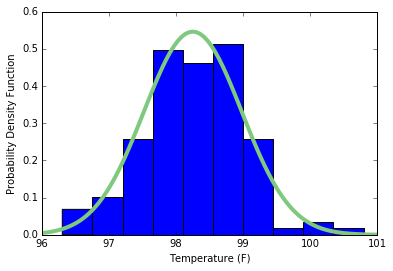

In [66]:

#Q1: Is the distribution of body temperatures normal?

#Clean the data (in case there are any empty spaces)
df=df0['temperature'].replace('', np.nan)
df=df.dropna()

#Male temperatures dataset
dfm=df0[df0.gender == 'M']
dfm=dfm['temperature'].replace().replace('', np.nan).dropna()

#Female temperatures dataset
dff=df0[df0.gender == 'F']
dff=dff['temperature'].replace().replace('', np.nan).dropna()

#Calculate sample mean and standard deviation
Tmean=np.mean(df)
Tstd= np.std(df)

#Generate normal distribution based on the sample meand and standard deviation
Stats= scipy.stats.norm(Tmean, Tstd)

    
#Plot the frequency distribution of body temperatures and compare it with normal distribution with the same parameters.
xs = np.linspace(96, 101, 90)
ys = Stats.pdf(xs)
plt.plot(xs, ys, linewidth=4, color=COLOR1)
plt.xlabel('Temperature (F)')
plt.ylabel('Probability Density Function')
plt.hist(df, bins = 10, normed = True)
plt.show()
   

Q1 Response: The sample data visually approximates normal distribution. 

In [67]:
#Q2: Is the true population mean really 98.6 degrees F?
# z-test or a t-test? How will the result be different?

#Determine sample size:
len(df)

#For sample sizes greater than 30, the central limit theorem can be used to describe the population distribution.
#Z-test statistic can be used for hypothesis testing.

130

In [68]:
def summarize_sampling_distribution(sample_stats):
    z_stat= (PTmean-sample_stats.mean())/sample_stats.std()
    p_value = (scipy.stats.norm.sf(abs(z_stat))*2)
    t_stat = scipy.stats.ttest_1samp(sample_stats, popmean=PTmean)
    
    print('Resampled Data Z-score: ', z_stat)
    print('Resampled Data P-value: ', p_value)
    print('Resampled Data t-score: ', t_stat,'\n')
    print('Standard Error: ', sample_stats.std())
    print('90% CI: ', np.percentile(sample_stats, [5, 95]))
    


class Resampler(object):
    """Represents a framework for computing sampling distributions."""
    
    def __init__(self, sample, xlim=None):
        """Stores the actual sample."""
        self.sample = sample
        self.n = len(sample)-1
        self.xlim = xlim
        
    def resample(self):
        """Generates a new sample by choosing from the original
        sample with replacement.
        """
        new_sample = np.random.choice(self.sample, self.n, replace=True)
        return new_sample
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return sample.mean() 
    
    def compute_sample_statistics(self, iters=1000):
        """Simulates many experiments and collects the resulting sample
        statistics.
        """
        stats = [self.sample_stat(self.resample()) for i in range(iters)]
        return np.array(stats)
    
    def plot_sample_stats(self):
        """Runs simulated experiments and summarizes the results.
        """
        sample_stats = self.compute_sample_statistics()
        summarize_sampling_distribution(sample_stats)
        plt.hist(sample_stats, color=COLOR2)
        plt.xlabel('sample statistic')
        plt.xlim(self.xlim)

In [69]:
def plot_resampled_stats(n):
        sample = Mtemps.rvs(n)
        resampler = Resampler(sample, xlim=[98, 98.5])
        resampler.plot_sample_stats()

Resampled Data Z-score:  3.30641463085
Resampled Data P-value:  0.00094498140647
Resampled Data t-score:  Ttest_1sampResult(statistic=-104.50571914189634, pvalue=0.0) 

Standard Error:  0.0687690348542
90% CI:  [ 98.25820808  98.48685873]


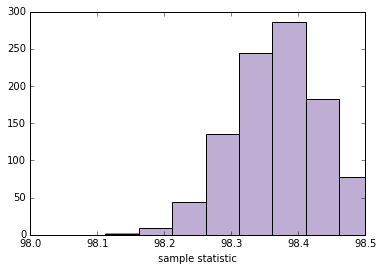

In [70]:
#Null Hypothesis: True population mean <> sample mean
PTmean=98.6

#Alternative Hypothesis: True population mean = sample mean

#Sample size(n-1):
n=len(df)-1

#Model the population distribution using the normal distribution function:
Mtemps = scipy.stats.norm(loc = Tmean, scale = Tstd)

#Z-Test stats output:
plot_resampled_stats(n=129)


Q2 Response: 

98.6F lies more than 4 standard deviations from the sample mean. The low P-value (less than 5%) also indicates the low probability of the population body temperature mean being equal to 98.6F. 

90% confidence interval indicates that population mean lies between 98.11F and 98.35F, which is below 98.6F.

These tests show that the null hypothesis can be rejected at 5% significance level. T-test shows similar results. 

In [71]:
#Q3: At what temperature should we consider someone's temperature to be "abnormal"?
#Start by computing the margin of error and confidence interval.

Q3 Response: Margin of erro and Confidence Interval are calculated above. 

90% confidence interval can be used to identify 'abnormal' temperatures. Body temperatures above 98.35F or below 98.13F can be considered abnormal. 


In [72]:
#Q4: Is there a significant difference between males and females in normal temperature?
# Set up and solve for a two sample hypothesis testing.

#Calculate mean and standard deviation:

#Female Statistics:
Smeanf=dff.mean()
Sstdf=dff.std()

#Male Statistics:
Smeanm=dfm.mean()
Sstdm=dfm.std()

Adiff=abs(Smeanf-Smeanm)

print('Sample mean temperature-Males: ', Smeanm)
print('Sample std temperature-Males: ', Sstdm, '\n')
print('Sample mean temperature-Females: ', Smeanf)
print('Sample std temperature-Females: ', Sstdf, '\n')
print('Absolute mean difference between males and females: ', Adiff )

Sample mean temperature-Males:  98.1046153846154
Sample std temperature-Males:  0.6987557623265908 

Sample mean temperature-Females:  98.39384615384613
Sample std temperature-Females:  0.7434877527313665 

Absolute mean difference between males and females:  0.289230769230727


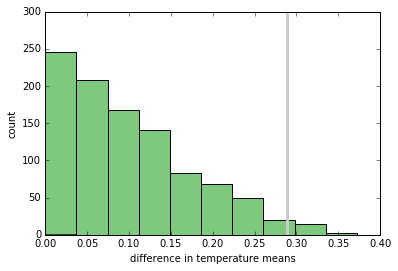

In [73]:
#Temperature samples for men and women show slightly different means and standard deviations.
#To test if these differences can be explained by randomness we need to set up a hypothesis test.

#Null hypothesis: there is no difference in body temperatures between males and females at 5% significance level.
#Alternative hypothesis: differences in body temperatures between males and females are significant to be explained
#by randomness.

#Create a pooled sample:
m, f = len(dfm), len(dff)
pool =np.hstack((dfm,dff))

#Generate a test statistic for comparing differences in sample means.
def TStatistic(data):
    m, f = data
    test_stat = abs(m.mean() - f.mean())
    return test_stat

#Actual difference in temperatures between males and females stored in 'Adiff' variable for benchmarking
Adiff

#Reshuffle the pool data and create two different datasets of the same size
def RModel():
    np.random.shuffle(pool)
    data=pool[:m], pool[m:]
    return data

#Generate randomized mean temperature differences in two equally-sized population groups  
tstats=np.array([TStatistic(RModel()) for i in range (1000)])


plt.vlines(Adiff, 0, 300, linewidth=3, color='0.8')
plt.hist(tstats, color=COLOR1)
plt.xlabel('difference in temperature means')
plt.ylabel('count')
None

In [74]:
#Test to see if the null hypothesis is correct:

p_val = sum(tstats >= Adiff)/len(tstats)

p_val


0.02

Q4 Response: 

Based on the p-value of approximately 0.02, the difference between the male and female mean body temperatures is unlikely to be explained by randomness. At 5% significance level, the null hypothesis (i.e. no difference between mean male and female body temperatures) can be rejected.